<Axes: xlabel='Date'>

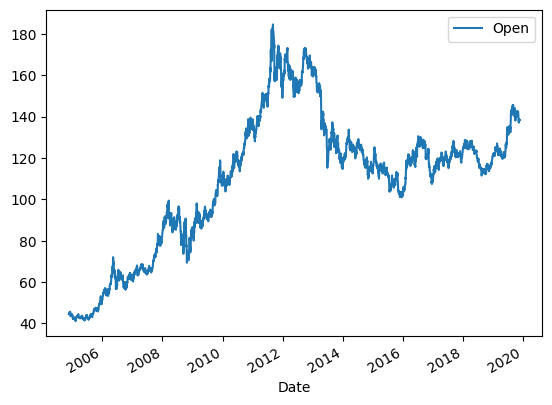

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#
# Load AutoReg class from statsmodels.tsa.ar_model module
#
from statsmodels.tsa.ar_model import AutoReg
# Load and plot the time-series data
#

df_a = pd.read_csv('GLD.csv')
df = df_a.drop(columns=['High', 'Low', 'Close', 'Adj Close', 'Volume'])
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df.plot()

In [2]:

df

,Open
Date,
2004-11-18,44.430000
2004-11-19,44.490002
2004-11-22,44.750000
2004-11-23,44.880001
2004-11-24,44.930000
...,...
2019-11-18,138.440002
2019-11-19,138.130005
2019-11-20,138.529999


P-value:  0.38140146807411573


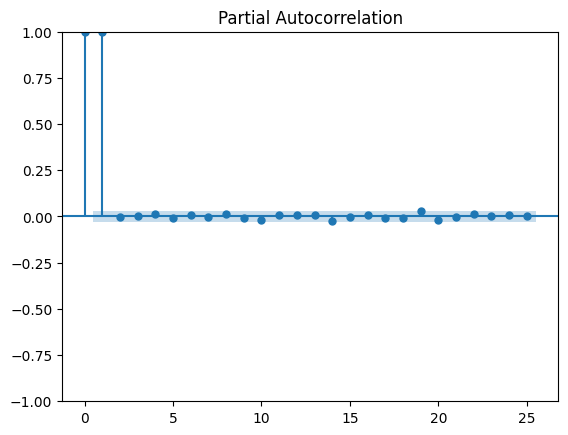

In [3]:
#
# Check for stationarity of the time-series data
# We will look for p-value. In case, p-value is less than 0.05, the time series
# data can said to have stationarity
#
from statsmodels.tsa.stattools import adfuller
#
# Run the test
#
df_stationarityTest = adfuller(df['Open'], autolag='AIC')
#
# Check the value of p-value
#
print("P-value: ", df_stationarityTest[1])
#
# Next step is to find the order of AR model to be trained
# for this, we will plot partial autocorrelation plot to assess
# the direct effect of past data on future data
#
from statsmodels.graphics.tsaplots import plot_pacf
pacf = plot_pacf(df['Open'], lags=25)

In [4]:
#
# Create training and test data
#
train_data = df['Open'][:len(df)-100]
test_data = df['Open'][len(df)-100:]
#
# Instantiate and fit the AR model with training data
#
ar_model = AutoReg(train_data, lags=8).fit()
#
# Print Summary
#
print(ar_model.summary())


                            AutoReg Model Results                             
Dep. Variable:                   Open   No. Observations:                 3680
Model:                     AutoReg(8)   Log Likelihood               -6004.316
Method:               Conditional MLE   S.D. of innovations              1.241
Date:                Mon, 01 Jan 2024   AIC                          12028.632
Time:                        14:30:28   BIC                          12090.717
Sample:                             8   HQIC                         12050.735
                                 3680                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1434      0.070      2.061      0.039       0.007       0.280
Open.L1        1.0045      0.017     60.860      0.000       0.972       1.037
Open.L2       -0.0124      0.023     -0.528      0.5

C:\Users\vrlit\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [5]:
test_data

Date
2019-07-05    131.460007
2019-07-08    132.179993
2019-07-09    131.429993
2019-07-10    132.940002
2019-07-11    133.580002
                 ...    
2019-11-18    138.440002
2019-11-19    138.130005
2019-11-20    138.529999
2019-11-21    138.389999
2019-11-22    138.369995
Name: Open, Length: 100, dtype: float64

C:\Users\vrlit\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\vrlit\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\vrlit\anaconda3\Lib\site-packages\statsmodels\tsa\deterministic.py:307: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


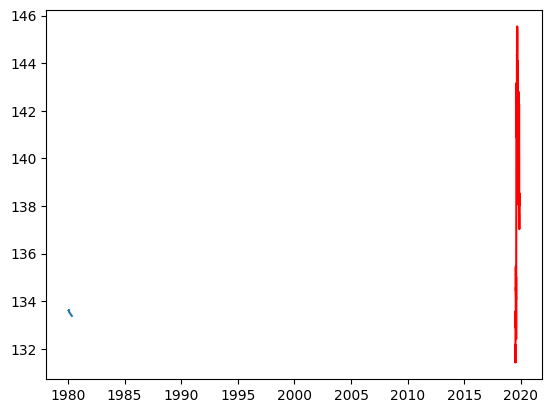

In [6]:
#
# Make the predictions
#
pred = ar_model.predict(start=len(train_data), end=(len(df)-1), dynamic=False)
#
# Plot the prediction vs test data
#
from matplotlib import pyplot
pyplot.plot(pred)
pyplot.plot(test_data, color='red')

In [7]:
pred

3680    133.615012
3681    133.617072
3682    133.603804
3683    133.617691
3684    133.615929
           ...    
3775    133.393724
3776    133.391845
3777    133.389968
3778    133.388093
3779    133.386221
Length: 100, dtype: float64